In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from warnings import filterwarnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import time
filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [43]:
#load datasets
data=pd.read_csv('result_sf(1).csv')

In [44]:
#split datasets into trainset(75%) and testsets(25%)
y=data['price']
X=data.drop(['price'],axis = 1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [52]:
#Define a performance measurement function
def performance(estimator,model_name="LinearRegression"):
    #predict price in trainset
    y_pred_train=estimator.predict(X_train)
    y_pred_train=np.where(y_pred_train<0,0,y_pred_train)

    #predict price in testset
    y_pred_test=estimator.predict(X_test)
    y_pred_test=np.where(y_pred_test<0,0,y_pred_test)

    #r2
    r2_train=r2_score(y_train,y_pred_train)
    r2_test=r2_score(y_test,y_pred_test)
    print("{}:r2_train={}".format(model_name,r2_train))
    print("{}:r2_test={}".format(model_name,r2_test))
    print("--------------------------------------------------------------------")

    #caculate mse in trainset
    mse_train=mean_squared_error(y_train,y_pred_train)
    print("{}:mse_train={}".format(model_name,mse_train))

    #caculate mse in testset
    mse_test=mean_squared_error(y_test,y_pred_test)
    print("{}:mse_test={}".format(model_name,mse_test))


    #rmse
    rmse_train=rmse=np.sqrt(mse_train)
    rmse_test=rmse=np.sqrt(mse_test)

    print("{}:rmse_train={}".format(model_name,rmse_train))
    print("{}:rmse_test={}".format(model_name,rmse_test))
    print("--------------------------------------------------------------------")

    #comparison of between actual price and predicted price in trainset
    compare_train=pd.DataFrame({'y_train':y_train,
                               'y_pred_train':y_pred_train},index=range(len(y_train)))
    compare_train.plot.line(title="comparison of between actual price and predicted price in trainset")

    print("--------------------------------------------------------------------------------------------------")
    #comparison of between actual price and predicted price in testset
    compare_test=pd.DataFrame({'y_test':y_test,
                               'y_pred_test':y_pred_test},index=range(len(y_test)))
    compare_test.plot.line(title="comparison of between actual price and predicted price in testset")
    


# Linear Regression

Linear regression:r2_train=0.4690570668559805
Linear regression:r2_test=0.4556017758559364
--------------------------------------------------------------------
Linear regression:mse_train=3214.0832918983974
Linear regression:mse_test=3163.5477535892132
Linear regression:rmse_train=56.69288572562167
Linear regression:rmse_test=56.245424290240834
--------------------------------------------------------------------
--------------------------------------------------------------------------------------------------


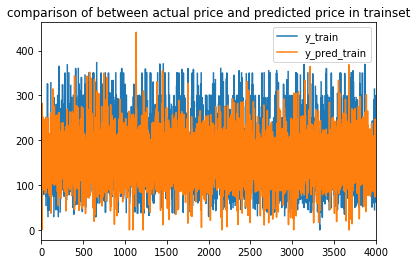

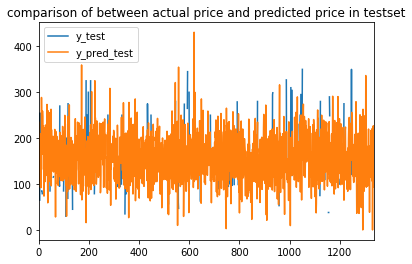

In [53]:
ols=LinearRegression(normalize=True)
ols.fit(X_train,y_train)

#performance metric
performance(ols,model_name="Linear regression")


# Lasso Regression

Lasso regression:r2_train=0.45380501432701803
Lasso regression:r2_test=0.4421179323352642
--------------------------------------------------------------------
Lasso regression:mse_train=3306.412173479344
Lasso regression:mse_test=3241.903598608066
Lasso regression:rmse_train=57.5014101868758
Lasso regression:rmse_test=56.93771683697956
--------------------------------------------------------------------
--------------------------------------------------------------------------------------------------


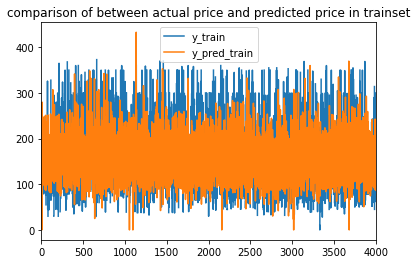

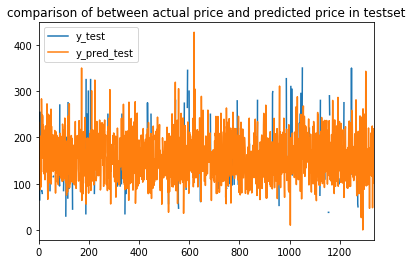

In [54]:
#10-folds cross validation
las=LassoCV(n_jobs=-1,cv=10)
las.fit(X_train,y_train)

#performance metric
performance(las,model_name="Lasso regression")

# Decision Tree Regression 

DecisionTree regression:r2_train=0.61825216942635
DecisionTree regression:r2_test=0.4401693769052326
--------------------------------------------------------------------
DecisionTree regression:mse_train=2310.9250493261775
DecisionTree regression:mse_test=3253.2268320060307
DecisionTree regression:rmse_train=48.07208180769975
DecisionTree regression:rmse_test=57.03706542246042
--------------------------------------------------------------------
--------------------------------------------------------------------------------------------------


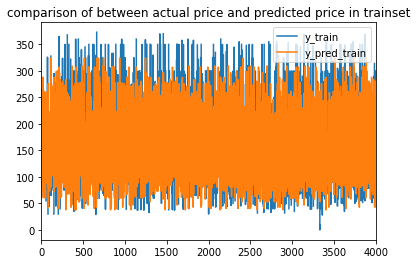

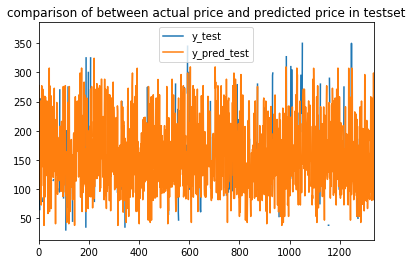

In [55]:
#Decision Tree Regression
params={'min_samples_leaf':range(1,11)}
dt=DecisionTreeRegressor(random_state=1)
#5-folds cross validation
reg=GridSearchCV(dt,params,n_jobs=-1,cv=5,scoring="neg_mean_squared_error")
reg.fit(X_train,y_train)

#performance metric
performance(reg.best_estimator_,model_name="DecisionTree regression")

# Random Forest 

RandomForest regression:r2_train=0.662610268652343
RandomForest regression:r2_test=0.5158115874376262
--------------------------------------------------------------------
RandomForest regression:mse_train=2042.4016041822854
RandomForest regression:mse_test=2813.663044702141
RandomForest regression:rmse_train=45.19293754761119
RandomForest regression:rmse_test=53.04397274622387
--------------------------------------------------------------------
--------------------------------------------------------------------------------------------------


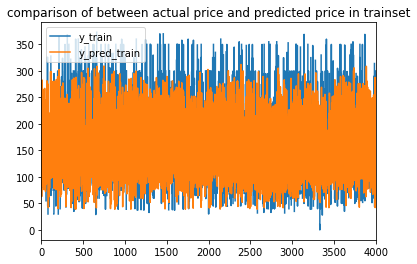

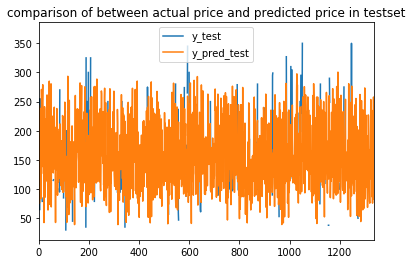

In [56]:
#Random Forest Regression
params={'min_samples_leaf':range(1,11)}
rf=RandomForestRegressor(n_jobs=-1,random_state=1,n_estimators=500)

#5-folds cross validation
reg=GridSearchCV(rf,params,n_jobs=-1,cv=5,scoring="neg_mean_squared_error")
reg.fit(X_train,y_train)

#performance metric
performance(reg.best_estimator_,model_name="RandomForest regression")



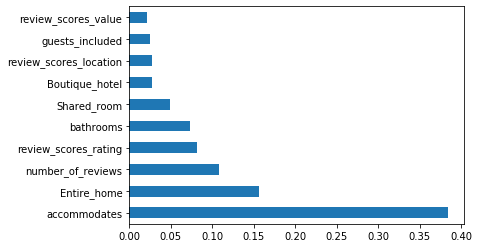

In [57]:
#importance of features
feature_importance=pd.Series(reg.best_estimator_.feature_importances_,index=X_test.columns)
import_top10=feature_importance.sort_values(ascending=False)[:10]
import_top10.plot.barh()